In [257]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Data Cleaning

In [7]:
# df = pd.read_csv('gender.csv')
# # df = df.groupby('Favorite Beverage')['Gender'].apply(lambda tags: ','.join(tags))
# ## menghapus column gender
# # df = df.drop(columns='Gender')
# # menghapus row yang colom gendernya null
# df = df[df['Favorite Color'].isna() == False]
# ## count duplicate
# # df.duplicated().value_counts()
# df = df.drop_duplicates()
# # df = df.groupby('Favorite Music Genre')['Gender'].value_counts().unstack(fill_value=0)

# # df.plot(figsize=(12, 6))

# # type(df['Gender'])

# # for i in df:
# #     print(df[i].value_counts())


# df


## Data Preparation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


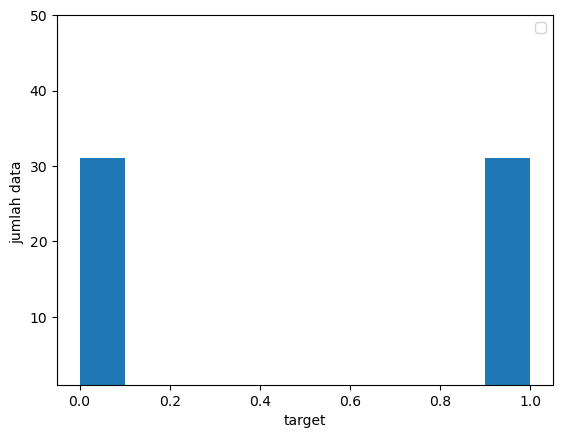

In [4]:
from sklearn.ensemble import RandomForestClassifier
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

df = pd.read_csv('gender.csv')

df = pd.read_csv('gender.csv')
# df = df[df['Favorite Color'].isna() == False]
df = df.fillna({'Favorite Color':'cool'})
filter_gender = {'F':0,'M':1}
df = df.replace(filter_gender)
df = df.drop_duplicates()
data = pd.get_dummies(df, columns = ['Favorite Color','Favorite Music Genre','Favorite Beverage','Favorite Soft Drink']) 
plt.hist(df['Gender'])
plt.ylim(1,50)
plt.xlabel('target')
plt.ylabel('jumlah data ')
# Mengubah ke tipe tertentu
# one_hot_encoded_data.astype(int)

# Menggabungkan colomn
# df.join(one_hot_encoded_data.drop(['Gender'], axis=1))


## splitting data

In [46]:
# Split the data into features (X) and target (y)
X = data.drop(['Gender'], axis=1)
y = data['Gender']


## Training Data Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Import train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report


# # Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rf = RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(X_train, y_train)

#prediksi per sample (13 sample)
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



# Precision, recall, dan F1-score
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# prediksi per row
y_pred = rf.predict(X.tail(1))[0]
print(f"prediksi {y_pred}")





# Training Model Naive Bayes


In [181]:
from sklearn.naive_bayes import GaussianNB
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print("Number of mislabeled points out of a total %d points : %d" % (X_test.shape[0], (y_test != y_pred).sum()))
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
y_test.shape

Number of mislabeled points out of a total 13 points : 7
Accuracy: 0.46153846153846156


(13,)

# Training Model SVM

In [216]:
from sklearn import svm
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf = svm.SVC()
clf.fit(X_train, y_train)
clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.38461538461538464


# Training Model KNNeighbors

[0]


(array([0., 1., 1.]),
 array([0., 0., 1., 1.]),
 <BarContainer object of 3 artists>)

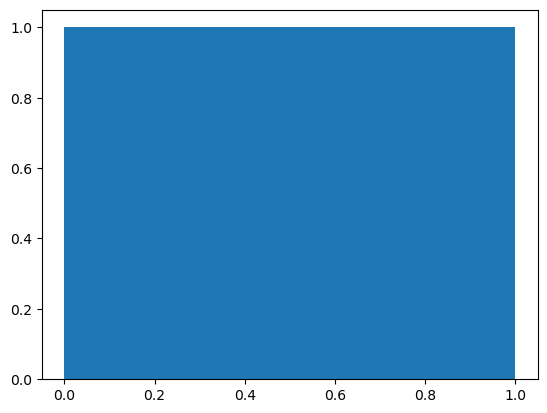

In [263]:
from sklearn.neighbors import KNeighborsClassifier
X = [[0], [1], [2], [3]]
y = [0, 0, 1, 1]
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X, y)
print(neigh.predict([[1.49]]))
plt.hist(np.ravel(X),y)
